In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data
data = pd.read_csv('/content/vyttiladate_Winsorization.csv')

In [ ]:
# Drop the rows with missing values
data = data.dropna()

In [ ]:
# Split the data into features and target
X = data[['PM10', 'PM2. 5', 'CO']]
y = data['AQI']

In [ ]:
# Normalize the feature data
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)


In [ ]:
# Normalize the target variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [ ]:
# Inverse transform the predictions and test set using the target scaler
y_pred_actual = scaler_y.inverse_transform(y_pred.reshape(-1, 1))[:, 0]
y_test_actual = scaler_y.inverse_transform(y_test)[:, 0]

In [ ]:
# Calculate the mean squared error
mse = np.mean((y_pred_actual - y_test_actual) ** 2)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 183.09


In [ ]:
# Make predictions for the next three days
future_data = data.tail(3)[['PM10', 'PM2. 5', 'CO']]
future_data_scaled = scaler_X.transform(future_data)
future_predictions = rf_regressor.predict(future_data_scaled)
future_predictions_actual = scaler_y.inverse_transform(future_predictions.reshape(-1, 1))[:, 0]


In [ ]:
print('\nPredicted AQI for the next three days:')
for i, pred in enumerate(future_predictions_actual):
    print(f'Day {i+1}: {pred:.2f}')


Predicted AQI for the next three days:
Day 1: 108.29
Day 2: 114.61
Day 3: 68.99


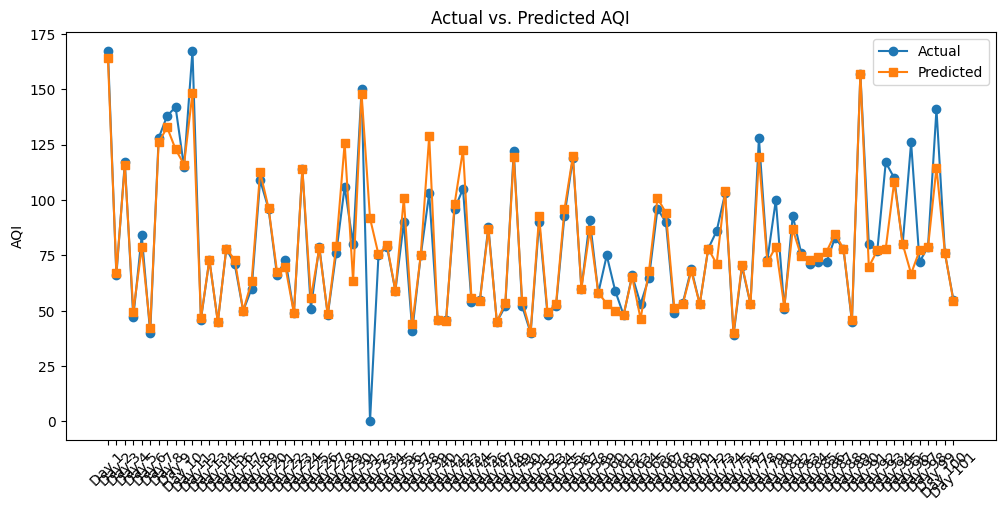

In [ ]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the actual values
ax.plot(y_test_actual, label='Actual', marker='o')

# Plot the predicted values
ax.plot(y_pred_actual, label='Predicted', marker='s')

# Set the x-axis tick labels
ax.set_xticks(range(len(y_test_actual)))
ax.set_xticklabels([f'Day {i+1}' for i in range(len(y_test_actual))], rotation=45)

# Set the y-axis label
ax.set_ylabel('AQI')

# Set the title
ax.set_title('Actual vs. Predicted AQI')

# Add a legend
ax.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()

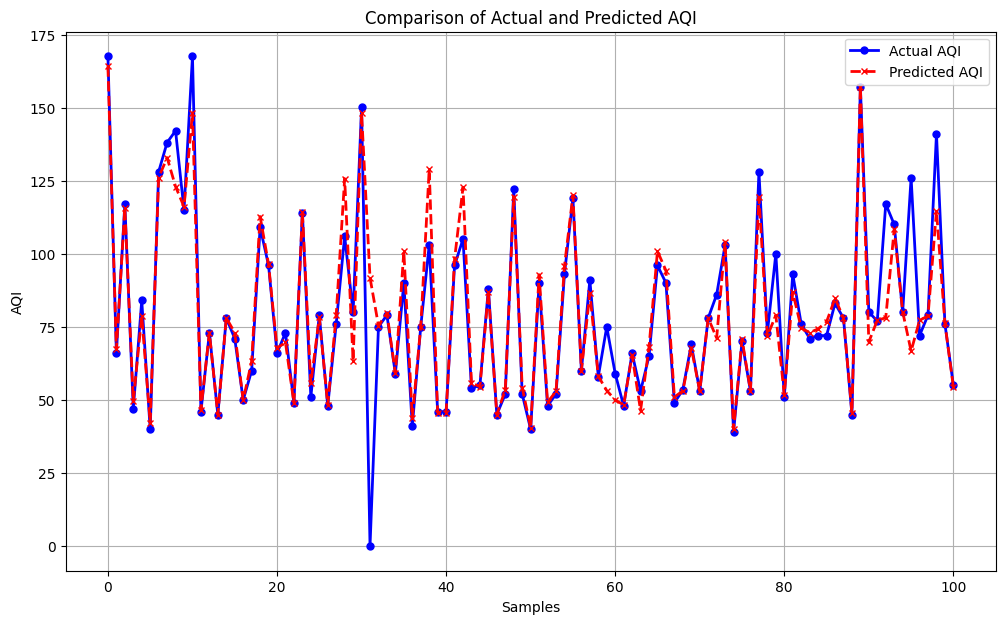

In [ ]:
# Assuming this is your predicted and actual values from a Random Forest or similar model
# If you've just run the model, ensure y_pred and y_test are still defined

# Simulate inverse transformation for demonstration; replace with your actual values
aqi_mean = data['AQI'].mean()  # Use the mean of your actual AQI values
aqi_std = data['AQI'].std()    # Use the standard deviation of your actual AQI values

# Assuming y_test and y_pred are your actual and predicted values in normalized form
# Inverse transform to original scale (if you had applied normalization earlier)
y_test_original = (y_test * aqi_std) + aqi_mean
y_pred_original = (y_pred * aqi_std) + aqi_mean

# Now, let's plot
plt.figure(figsize=(12, 7))
plt.plot(range(len(y_test_original)), y_test_original, label='Actual AQI', marker='o', linestyle='-', markersize=5, color='blue', linewidth=2)
plt.plot(range(len(y_pred_original)), y_pred_original, label='Predicted AQI', marker='x', linestyle='--', markersize=5, color='red', linewidth=2)
plt.title('Comparison of Actual and Predicted AQI')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()